In [ ]:
%matplotlib inline


# Cross-validation using the trial-by-trail hidden states’ FO to predict the type (mixed or dominant) of the upcoming transition.

Adapted from a tutorial exercise which uses cross-validation with linear models.

This exercise is used in the `cv_estimators_tut` part of the
`model_selection_tut` section of the `stat_learn_tut_index`.


In [6]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

import scipy.io
from sklearn import svm
from sklearn.model_selection import cross_val_score


Automatically created module for IPython interactive environment


In [8]:
#  load data
data = scipy.io.loadmat("/Users/lvdian/data/BR-project-master/Analysis-4_HMM/results/cvDATA.mat")

In [64]:
X = data['cvX1']
y = np.ravel(data['cvy1'])
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-5, 0, 10)


In [65]:
C_s

array([1.00000000e-05, 3.59381366e-05, 1.29154967e-04, 4.64158883e-04,
       1.66810054e-03, 5.99484250e-03, 2.15443469e-02, 7.74263683e-02,
       2.78255940e-01, 1.00000000e+00])

In [66]:
# for BR condition
X = data['cvX1']
y = np.ravel(data['cvy1'])
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-5, 0, 10)

many_scores = list()
scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    many_scores.extend(this_scores)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))


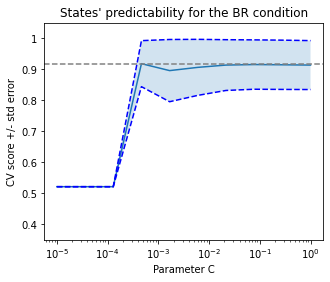

In [142]:

# Do the plotting
plt.figure().set_size_inches(5, 4)
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(C_s, np.array(scores) + np.array(scores_std), 
                 np.array(scores) - np.array(scores_std), alpha=0.2)

locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score +/- std error')
plt.xlabel('Parameter C')
plt.title('States\' predictability for the BR condition')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.ylim(0.35, 1.05)

plt.savefig('/Users/lvdian/Dropbox/BR_paper/figs/pngs/CV_BR_result.png')


In [69]:
# for RPL condition
X2 = data['cvX2']
y2 = np.ravel(data['cvy2'])
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-5, 0, 10)

scores2 = list()
many_scores2 = list()
scores_std2 = list()
for C in C_s:
    svc.C = C
    this_scores2 = cross_val_score(svc, X2, y2, n_jobs=1)
    many_scores2.extend(this_scores2)
    scores2.append(np.mean(this_scores2))
    scores_std2.append(np.std(this_scores2))

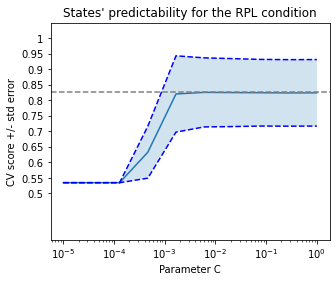

In [141]:
# Do the plotting
import matplotlib.pyplot as plt
plt.figure().set_size_inches(5, 4)
plt.semilogx(C_s, scores2)
plt.semilogx(C_s, np.array(scores2) + np.array(scores_std2), 'b--')
plt.semilogx(C_s, np.array(scores2) - np.array(scores_std2), 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(C_s, np.array(scores2) + np.array(scores_std2), 
                 np.array(scores2) - np.array(scores_std2), alpha=0.2)

locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.axhline(np.max(scores2), linestyle='--', color='.5')
plt.ylabel('CV score +/- std error')
plt.xlabel('Parameter C')
plt.title('States\' predictability for the RPL condition')
plt.ylim(0.35, 1.05)

plt.savefig('/Users/lvdian/Dropbox/BR_paper/figs/pngs/CV_RPL_result.png')

### Statistical testing on the (stablised) CV score between BR and RPL conditions

In [95]:
from scipy import stats as stat

In [71]:
# find the range of regulatisation values
change_scores = [y-x for x, y in zip(scores[:-1], scores[1:])]
change_scores2 = [y-x for x, y in zip(scores2[:-1], scores2[1:])]

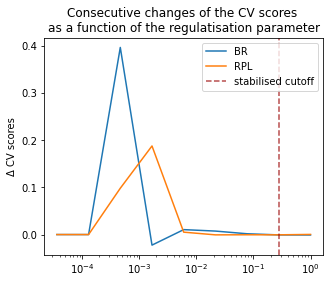

In [143]:
plt.figure().set_size_inches(5, 4)
ax = plt.subplot(111)
ax.semilogx(C_s[1:],change_scores, label='BR')
ax.semilogx(C_s[1:],change_scores2,label='RPL')
plt.ylabel("Δ CV scores")
ax.axvline(C_s[-2], linestyle='--', color=(0.6, 0., 0., 0.7),label='stabilised cutoff')
#plt.legend('BR','RPL')
ax.legend()
plt.title('Consecutive changes of the CV scores \nas a function of the regulatisation parameter')
plt.savefig('/Users/lvdian/Dropbox/BR_paper/figs/pngs/CV_BRvsRPL_result.png')

In [87]:
stable_scores = many_scores[-20:]
stable_scores2 = many_scores2[-20:]

In [113]:
mean_score = np.mean(stable_scores)
std_score = np.std(stable_scores)
mean_score2 = np.mean(stable_scores2)
std_score2 = np.std(stable_scores2)
print("The accuracy of the FO predicting the upcoming perceptual type is %.4f +/- %.4f for the BR condition; and %.4f +/- %.4f for the RPL condition."%(mean_score,std_score,mean_score2,std_score2))

The accuracy of the FO predicting the upcoming perceptual type is 0.9138 +/- 0.0798 for the BR condition; and 0.8240 +/- 0.1077 for the RPL condition.


In [114]:
stat.ttest_ind(stable_scores, stable_scores2)

Ttest_indResult(statistic=2.9192562691189843, pvalue=0.005868829378054363)